In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 50개의 X를 생성합니다.
x = np.arange(50)

# a=기울기, b=절편
a = 0.3
b = 0.8

# 선형회귀 식을 작성합니다. y 값을 산출합니다.
y = a * x + b

In [2]:
# 노이즈를 랜덤하게 생성합니다.
noise = np.random.uniform(-1.25, 1.25, size=y.shape)

In [3]:
# y 값에 노이즈를 추가합니다.
yy = y + noise

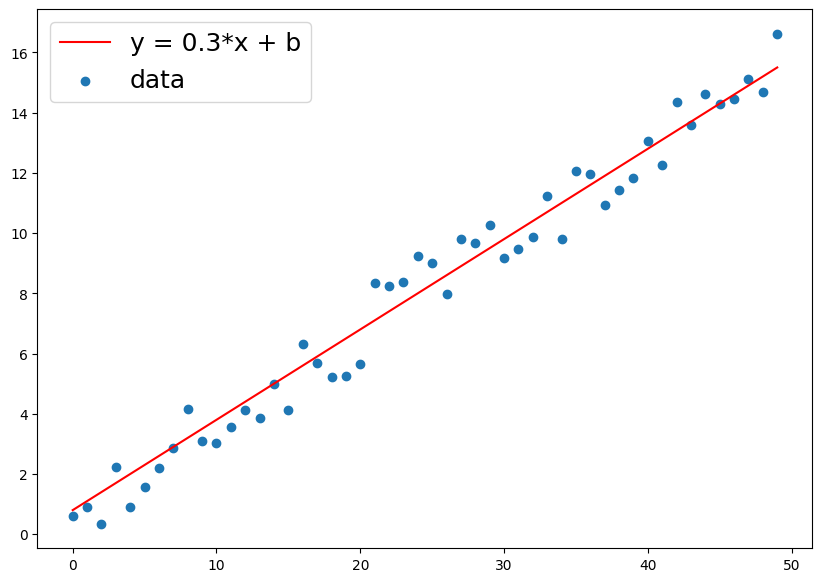

In [4]:
plt.figure(figsize=(10, 7))
plt.plot(x, y, color='r', label='y = 0.3*x + b')
plt.scatter(x, yy, label='data')
plt.legend(fontsize=18)
plt.show()

In [5]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.arange(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

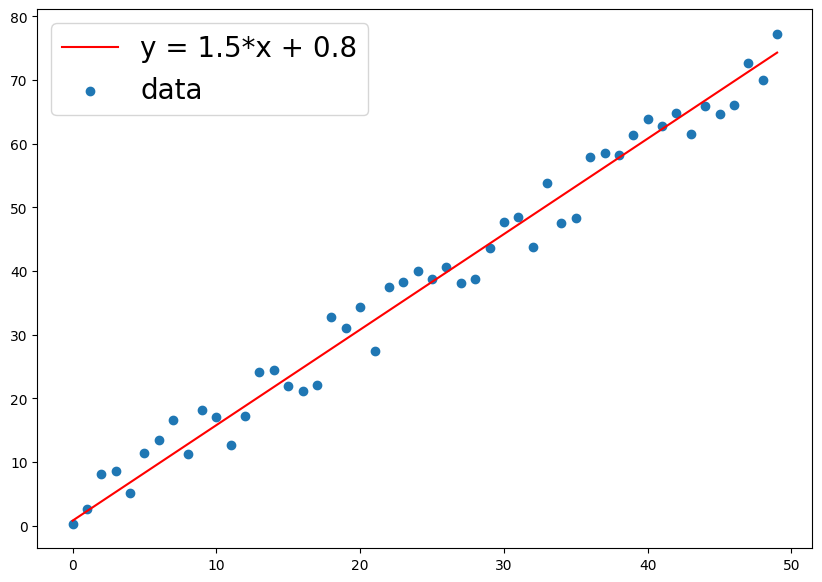

w: 1.5, b: 0.8


In [6]:
x, y = make_linear(size=50, w=1.5, b=0.8, noise=5.5)

In [7]:
x_bar = x.mean()
y_bar = y.mean()

In [8]:
# w 의 계수 값 찾기 

calculated_weight = ((x - x_bar) * (y - y_bar)).sum() / ((x - x_bar)**2).sum()
print('w: {:.2f}'.format(calculated_weight))

w: 1.45


In [9]:
calculated_bias = y_bar - calculated_weight * x_bar

In [10]:
print('b: {:.2f}'.format(calculated_bias))

b: 2.29


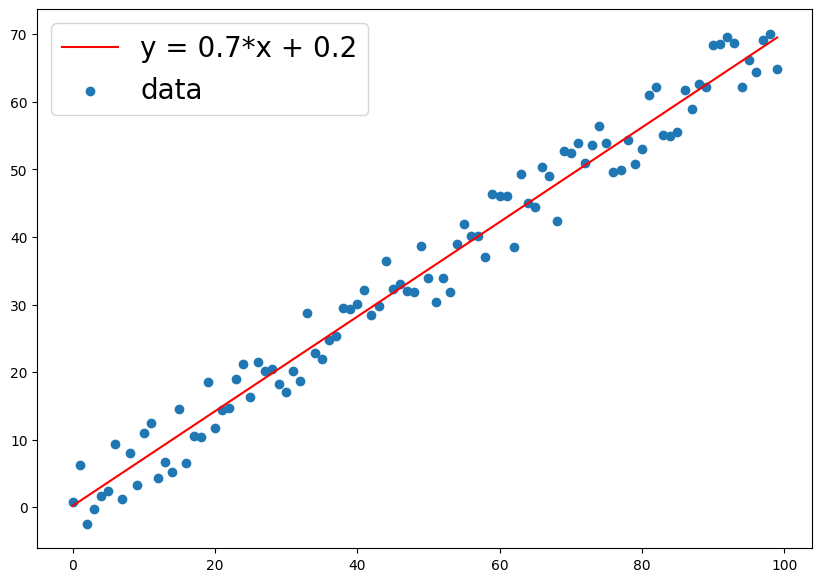

w: 0.7, b: 0.2


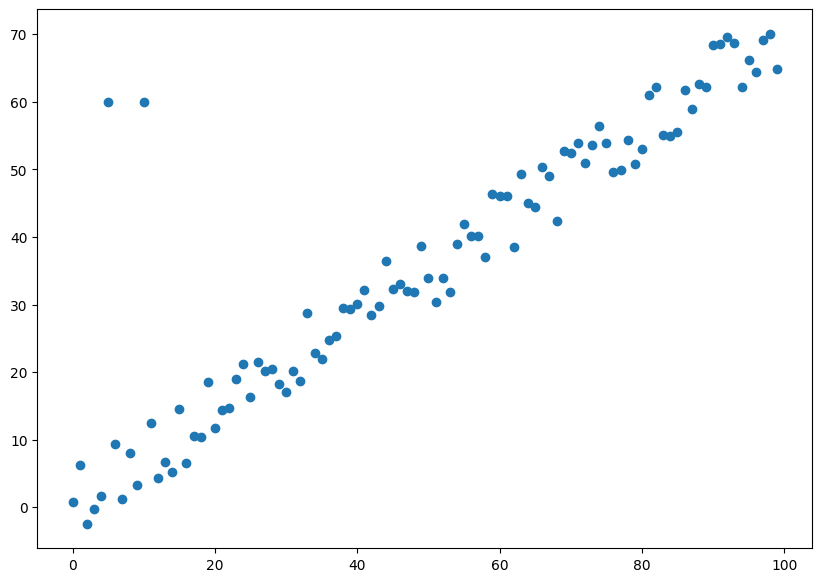

In [11]:
# 최소 제곱법은 노이즈에 취약 
x, y = make_linear(size=100, w=0.7, b=0.2, noise=5.5)
# 임의로 2개의 outlier를 추가해 보도록 하겠습니다.
y[5]=60
y[10]=60
plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.show()

In [12]:
# 위에서 구한 w, b 찾는 공식을 그대로 적용합니다.
x_bar = x.mean()
y_bar = y.mean()
calculated_weight = ((x - x_bar) * (y - y_bar)).sum() / ((x - x_bar)**2).sum()
calculated_bias = y_bar - calculated_weight * x_bar

print('w: {:.2f}, b: {:.2f}'.format(calculated_weight, calculated_bias))

w: 0.65, b: 3.79


## 최소제곱법 (OLS)를 활용한 LinearRegression

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x.reshape(-1, 1), y)

print('w: {:.2f}, b: {:.2f}'.format(model.coef_[0], model.intercept_))

w: 0.65, b: 3.79
